In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

# Prerequisites

- Visualising curves
- Group theory -> Finite fields

**IMPORTANT**: 
- There is so much one can do in a notebook when it comes to explanations
- I highly recommend to watch the videos I link because they consist of verbal explanations and visualisations that will sharpen your intuition
- Also, you can pick one resources I mention and follow along with it

# Elliptic curves

Resources:  
- Introduction to mathematical cryptography book - Elliptic curve section - Pick to follow along (I followed this)
- Cryptography made simple - Elliptic curve section - Pick to follow along (if you understand projective planes)
- https://crypto.stanford.edu/pbc/notes/elliptic/  - Pick to follow along
- https://jeremykun.com/2014/02/08/introducing-elliptic-curves/ - Pick to follow along (Code is from here)
- http://www.geometer.org/mathcircles/ecc.pdf

## Equation and graphs

https://www.youtube.com/watch?v=RkpVQaNNDKA&list=PLKXdxQAT3tCssgaWOy5vKXAR4WTPpRVYK&index=74&ab_channel=JeffSuzuki

Elliptic curve equation:  
$Y^2 = X^3 + AX + B$  
With $16(4A^3 + 27B^2) \neq 0$

So, how does a curve look?  
play around with $a$ and $b$ to see how the curve looks

In [3]:
a = -3
b = 5

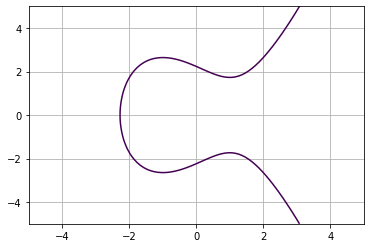

In [4]:
y, x = np.ogrid[-5:5:100j, -5:5:100j]
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])
plt.grid()
plt.show()

Here is an animation
- conda install -c conda-forge ffmpeg

In [7]:
y, x = np.ogrid[-5:5:100j, -5:5:100j]
#play with the limits of a and b
a = np.linspace(-10, 10, 300) 
b = np.linspace(-10, 10, 300)

fig = plt.figure()
#get the line
lines = plt.plot([])
line = lines[0]

#other setup
plt.xlim(-5, 5)
plt.ylim(-5, 5)

#animate functions
def animate(frame):
    fig.clear()
    plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a[frame] - b[frame], [0])

#call this to animate 
anim = FuncAnimation(fig, animate, frames =300, interval = 16.6)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html) #draws the display
plt.close()

Here is a desmos example: https://www.desmos.com/calculator/ialhd71we3

## Algebraic proprieties

### Point addition

Let $E$ be an elliptic curve. Let $P$,$Q$ $\in E$  
Then $E \cap L = \{P, Q, R\};$  
If$ \ R=(a, b) => P+Q=R' = -R = (a, -b)$  
$P-P = O$, $O$ is a point on every vertical line and acts as the 0 in this addition (We'll get into details in just a bit )

*Intuition*: 
- Draw a line between points $P$ and $Q$. 
- The place where the line intersects the curve is the point $R'$. 
- Flip that point to get $R = P + Q$


**Proprieties**:
- $P + O = O + P + P $
- $ P + (-P) = O$
- $P + Q = Q + P$
- $(P + Q) + R = P + (Q + R)$

Therefore points on E form and *abelian group*

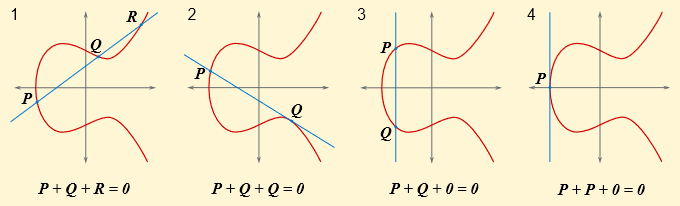


Algorithm
https://www.youtube.com/watch?v=2VpnPOken40&list=PLKXdxQAT3tCssgaWOy5vKXAR4WTPpRVYK&index=75
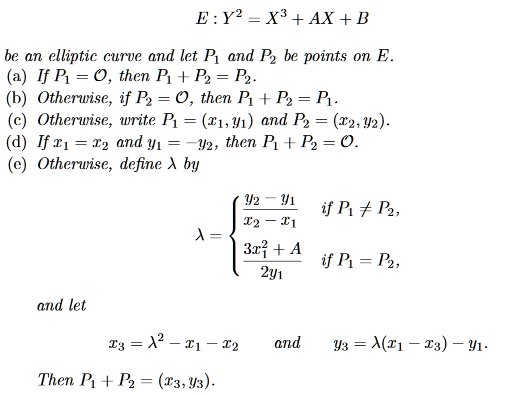

In [15]:
def elliptic_sum(P1, P2):
    '''Let a point P = (x, y); let O = (0, np.inf)'''
    x_1, y_1= P1
    x_2, y_2 = P2
    if(y_1 == np.inf):
        return P2
    elif(y_2 == np.inf):
        return P1
    elif(x_1 == x_2 and y_1 == -y_2):
        return (0, np.inf) #this is O
    else:
        lam = (y_2 - y_1)/(x_2 - x_1) if P1 != P2 else (3*(x_1**2) + a) / (2*y_1) #the slope
        x_3 = lam**2 - x_1 - x_2
        y_3 = lam*(x_1 - x_3) - y_1
        return (x_3, y_3)
                                                         

Example

In [9]:
a = -3
b = 5
y, x = np.ogrid[-5:5:100j, -5:5:100j]
z = pow(y, 2) - pow(x, 3) - x * a - b



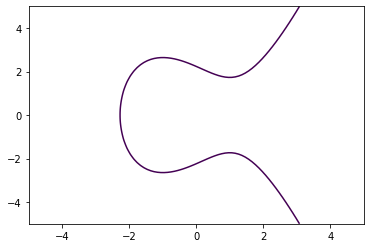

In [10]:
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])

In [11]:
P1 = (-2.1, pow(pow(-2.1, 3) + -2.1*a + b, .5))
P2 = (.2, pow(pow(.2, 3) + .2*a + b, .5))
P3 = elliptic_sum(P1, P2)
P3_temp = (P3[0], -P3[1])

In [12]:
P1, P2, P3, P3_temp

((-2.1, 1.427935572776307),
 (0.2, 2.099523755521713),
 (1.985260999471319, -2.620810794809187),
 (1.985260999471319, 2.620810794809187))

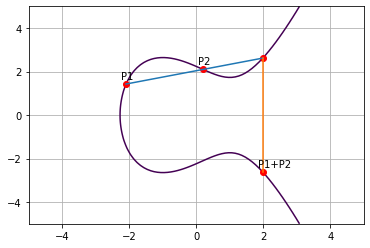

In [13]:
#plot the points
plt.plot(*P1, 'ro')
plt.annotate('P1', xy=P1, xytext=(-5, 5), textcoords='offset points')
plt.plot(*P2, 'ro')
plt.annotate('P2', xy=P2, xytext=(-5, 5), textcoords='offset points')
plt.plot(*P3, 'ro')
plt.annotate('P1+P2', xy=P3, xytext=(-5, 5), textcoords='offset points')
plt.plot(*P3_temp, 'ro')

#plot the lines
plt.plot([P1[0], P3_temp[0]], [P1[1], P3_temp[1]],)
plt.plot([P3[0], P3_temp[0]], [P3[1], P3_temp[1]],)
#plot the curve
plt.grid()
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])

## Other ways to visualise elliptic curves (Strenghten your intuition !)

### Projective planes

- **Must watch**: https://youtu.be/XXzhqStLG-4?t=1
- **Must Read**: https://crypto.stackexchange.com/questions/40947/what-is-the-projective-space
- https://en.wikipedia.org/wiki/Projective_plane
- https://www.youtube.com/watch?v=Hk0Fr-k7wmQ&list=PLN9KZDpNfsHMd7d7PX87JGesGY_Qzyb3V&index=7

*Intuition*
- We want to embed a 2 dimensional plane into 3 dimensions
- Each point $P$ on our the plane corresponds to some line that goes through $P$ and the origin
- We consider all points scaled by some $k$ to be equivalent 
- (0:0:0) is invalid

*Mathematically*:

- Let $\mathbb{R}^2 = \{(x, y) | x,y \in \mathbb{R}\}$ be the real number plane. Then we can define the projective real space as:
$$ \mathbb{RP}^2 = \{(x, y, z) \ | \ x, y, z \in \mathbb{R}\} \ \backslash  \ (0:0:0) \text{ with the equivalence relation ~ where ~: }  (x:y:z) \sim (x':y':z') \iff \exists k \ | \ (x, y, z) = (kx, ky, kz)   $$ 
- Example: $(2x : 2y : 2x) \sim (-4x: -4y: -4z) \sim (x: y:z)$

- Now let's choose (or divide by z to get) $z = 1 => (x:y:1) =$ affine slice = our $\mathbb{R}^2$ is embedded into $\mathbb{P}^2$

- Now let's check out $z = 0$. In this case no line that passes through origin passes through our initial plane ($k*0 = 0$). All these lines form a plane (x: y: 0). 
- Using the same methods we can project our plane (x: y: 0) to a line (x: 1: 0). We call this line the **Ideal Line**. We have the same problem with the point (x: :0: 0) tha isn't on this line.
- Repeating the step one more time => our missing point (1 :0 :0)

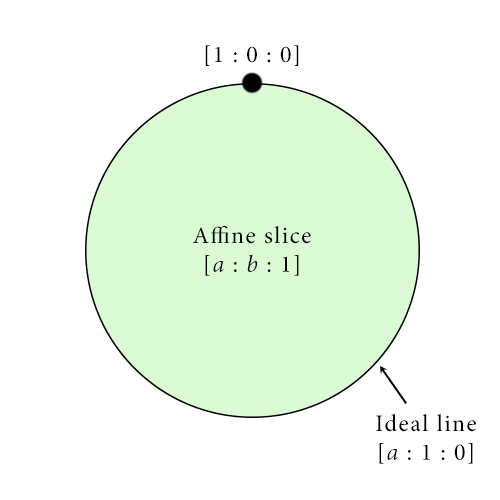

### Back to our curves

**Homogeneous equations**: we want to have the same degree on each side
$$y^2 = x^3 + ax + b => y^2z = x^3 + axz^2 + bz^3$$ 

Now let's check our special cases:
- $z = 1$ (the plane) => $y^2 = x^3 + ax + b$ which is our initial equation
- $z = 0$ => 
    - $y^2z = 0$ => y can take any value
    - $x^3 + axz^2 + bz^3 = x^3 = 0 => x = 0$
    - So we have our point $(0:k:0) \sim (0:1:0)$ which is the **point at infinity**
- $(1:0:0) \not \in \mathbb{E}$ since $y^2z = 0$ and  $x^3 + axz^2 + bz^3 = 1$
    
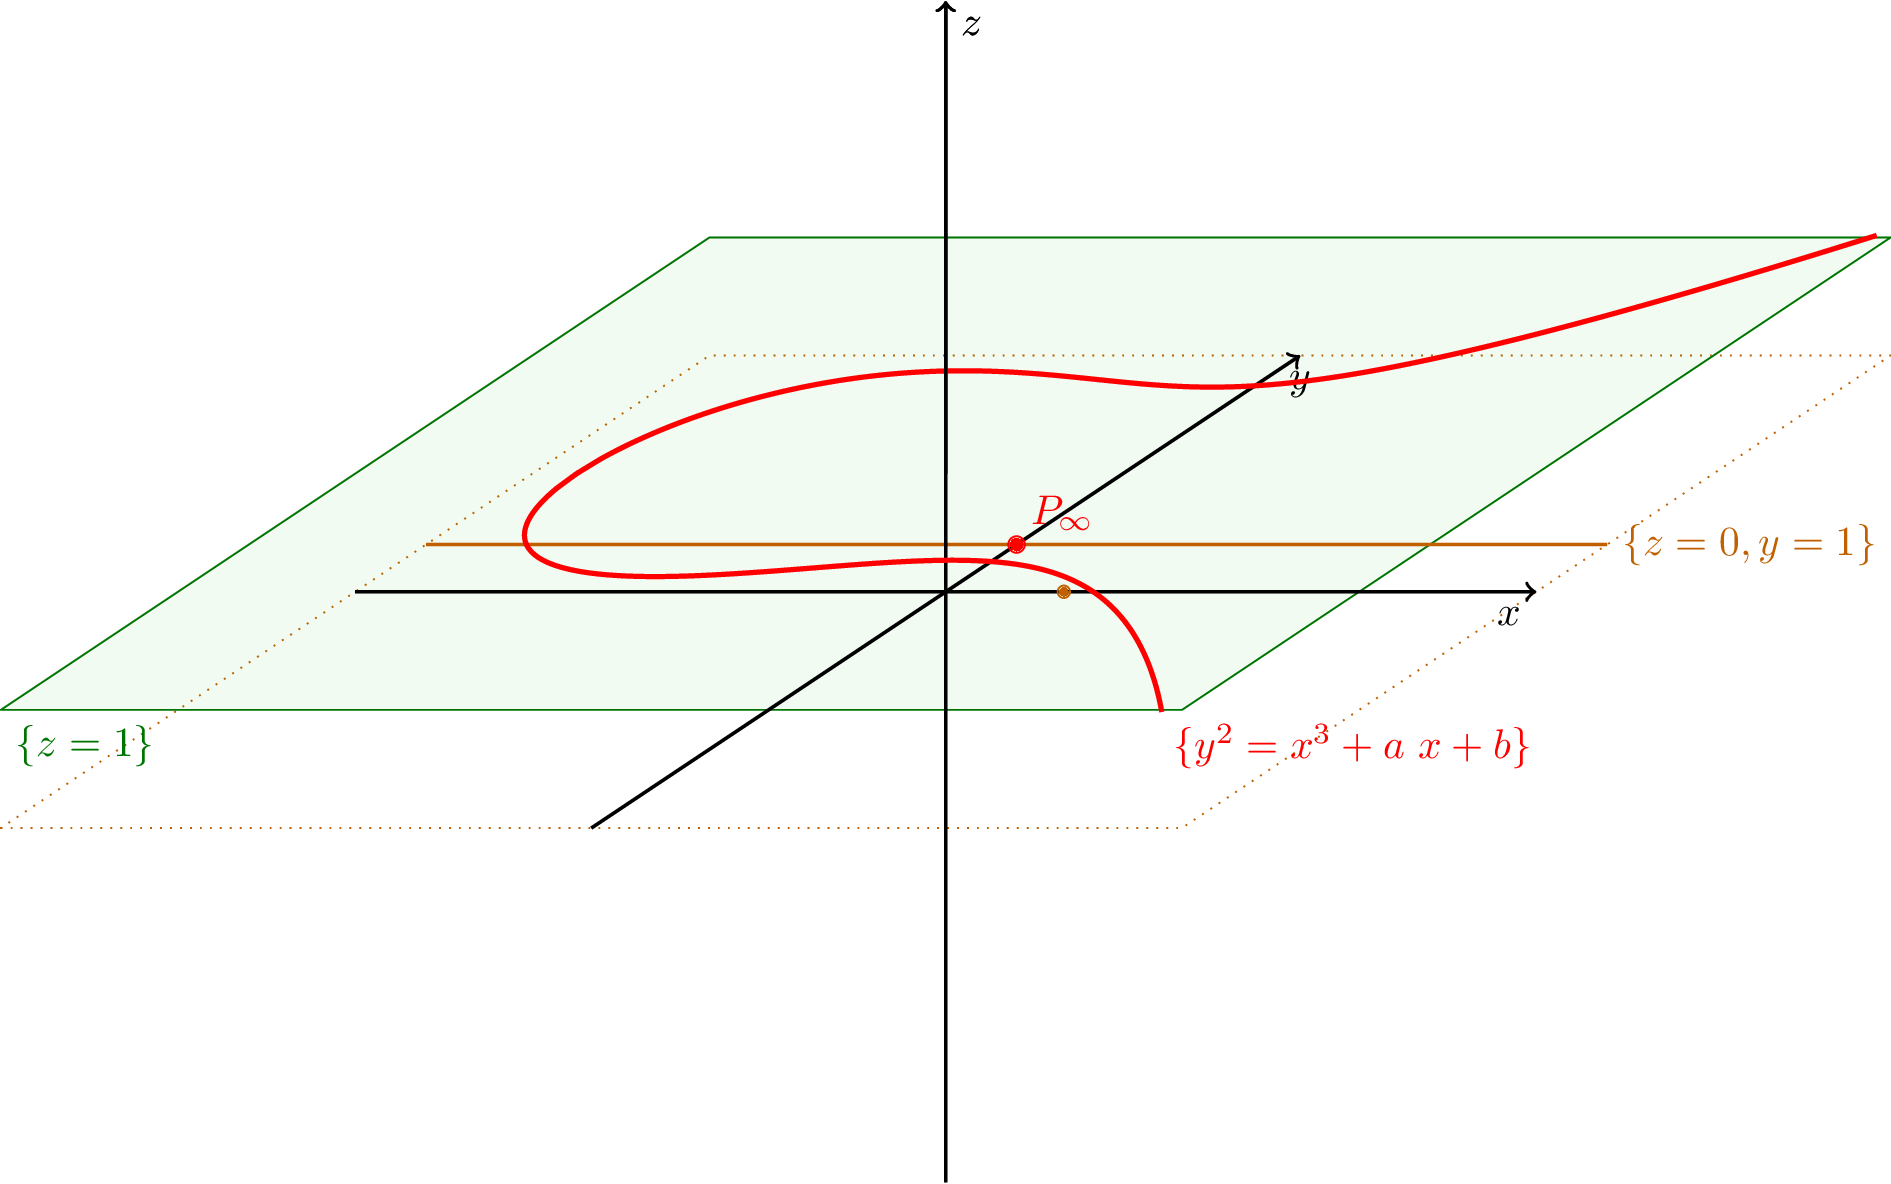


## Elliptic curves code

Before we continue let's implement elliptic curves from ground up 
https://jeremykun.com/2014/02/24/elliptic-curves-as-python-objects/

In [21]:
class Point(object):
    ''' 
    a point on a curve
    we consider the ideal to be (0, 1, 0)
    '''
    def __init__(self, curve, x, y, z = 1):
        if z == 1:
            self.curve = curve #the elliptic curve containing the point
            self.x, self.y = x, y
            self.z = z

            if not curve.test_point(x, y):
                raise Exception("The point %s is not on the given curve %s" %(self, curve))
        else:
            self.x, self.y, self.z = x, y, z
            self.curve = curve
            
            
    def __neg__(self):
        return Point(self.curve, self.x, -self.y)
    
    
    def __eq__(self, other):
        if(self.curve == other.curve and self.x == other.x and self.y == other.y):
            return True
        else:
            return False
    
    
    def __add__(self, other):
        if(self.z!=1):
            return other
        elif(other.z!=1):
            return self
        elif(self.x == other.x and self.y == -other.y):
            return Point(self.curve, 0, 1, 0) #point at infinity
        else:
            lam = (other.y - self.y)/ (other.x - self.x) if self!=other else (3*(self.x ** 2) + self.curve.a) / (2*self.y)
            x_3 = lam**2 - self.x - other.x
            y_3 = lam*(self.x - x_3) - self.y
        
        return Point(self.curve, x_3, y_3)
    
    
    def __sub__(self, other):
        return self + -other
          
        
    def __str__(self):
        return ("(%s, %s, %s)" % (self.x, self.y, self.z))
    
    
    def __mul__(self, n):
        if not isinstance(n, int):
            raise Exception ("can't scale if n isnt integer")
        else:
            if n<0:
                return -self * -n
            if n == 0:
                return Point(self.curve, 0, 1, 0) #point at infinity
            else:
                Q = self
                R = self if n & 1 == 1 else Point(self.curve, 0, 1, 0) #point at infinity
                
                i = 2
                while i<=n:
                    Q = Q + Q
                    if n & i == i:
                        R = Q + R
                    i = i << 1
        return R
    
    
    def __rmul__(self, n):
        return self * n

In [22]:
class EllipticCurve(object):
    def __init__(self, a, b):
        '''
        input a and b for the y^2 = x^3 + ax + b form
       
        '''
        self.a = a
        self.b = b
        self.discriminant = 4 * pow(a, 3) + 27 * pow(b, 2)
        if not self.is_smooth():
            raise Exception("the curve %s is not smooth!" % self)
        
        
    def is_smooth(self):
        return self.discriminant!=0
    
    
    def test_point(self, x, y):
        return pow(y, 2) == pow(x, 3) + self.a * x + self.b
    
    
    def __str__(self):
        return ('y^2 = x^3 + %Gx + %G' %(self.a, self.b))
    
    
    def __eq__(self, other):
        return (self.a, self.b) == (other.a, other.b)

In [23]:
c = EllipticCurve(a = 1, b = 2)
b = Point(c, 1, 2)
a = Point(c, 1, 2)

In [30]:
print(10 * a)
print(a)

(-1.0, 0.0, 1)
(1, 2, 1)


In [27]:
print(a - b)

(0, 1, 0)


# Resources
- Computerphile: https://www.youtube.com/watch?v=NF1pwjL9-DE&ab_channel=Computerphile
- https://andrea.corbellini.name/2015/05/17/elliptic-curve-cryptography-a-gentle-introduction/